In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime


def plot_histogram(values, title, bins=10):
    plt.figure()
    plt.hist(values, bins=bins)
    plt.title(title)
    plt.show()

    
def plot_histogram_from_dict(d, title):
    plt.figure()
    plt.bar(list(d.keys()), d.values())
    plt.title(title)
    plt.show()

In [2]:
def count_utrip_ids(df):
    temp = {}
    for index, row in df.iterrows():
        if row['utrip_id'] in temp:
            temp[row['utrip_id']] += 1
        else:
            temp[row['utrip_id']] = 1    
    plot_histogram(temp.values(), "N of trips in single utrip_id", bins=20)

In [3]:
def single_trip_duration(df):
    durations = []
    for index, row in df.iterrows():
        checkout = datetime.strptime(row['checkout'], "%Y-%m-%d")
        checkin = datetime.strptime(row['checkin'], "%Y-%m-%d")
        delta = checkout - checkin
        durations.append(delta.days)
    plot_histogram(durations, "Single trip duration", bins=15)

In [4]:
def single_trip_duration(df):
    durations = []
    for index, row in df.iterrows():
        checkout = datetime.strptime(row['checkout'], "%Y-%m-%d")
        checkin = datetime.strptime(row['checkin'], "%Y-%m-%d")
        delta = checkout - checkin
        durations.append(delta.days)
    plot_histogram(durations, "Single trip duration", bins=15)

In [5]:
def checkouts_by_weekday(df):
    checkouts = {}
    for index, row in df.iterrows():
        checkout = datetime.strptime(row['checkout'], "%Y-%m-%d")
        if not checkout.weekday() in checkouts:
            checkouts[checkout.weekday()] = 1
        else:
            checkouts[checkout.weekday()] += 1
    
    plot_histogram_from_dict(checkouts, "N of checkouts by weekday")
    
def checkins_by_weekday(df):
    checkins = {}
    for index, row in df.iterrows():
        checkin = datetime.strptime(row['checkin'], "%Y-%m-%d")
        if not checkin.weekday() in checkins:
            checkins[checkin.weekday()] = 1
        else:
            checkins[checkin.weekday()] += 1
    
    plot_histogram_from_dict(checkins, "N of checkins by weekday")

In [6]:
def count_unique_values(df, values):
    for value in values:
        print(f'N unique values of {value}: {df[value].nunique()}')

In [7]:
def analyse_data(path):
    df = pd.read_csv(path)
    count_utrip_ids(df)
    single_trip_duration(df)
    checkouts_by_weekday(df)
    checkins_by_weekday(df)
    count_unique_values(df, ['city_id', 'hotel_country', 'device_class', 'affiliate_id', 'booker_country'])
    
    print("\nNaN values:")
    print(df.isna().sum())

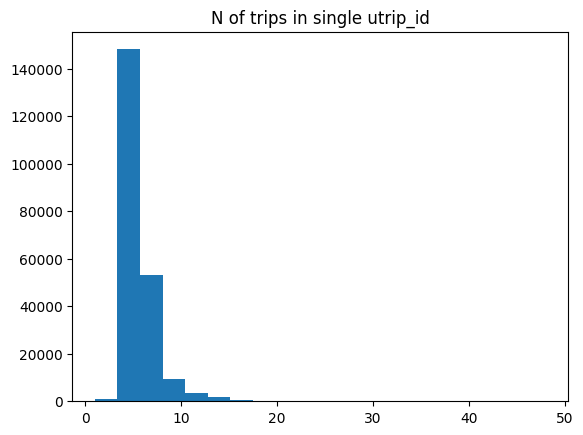

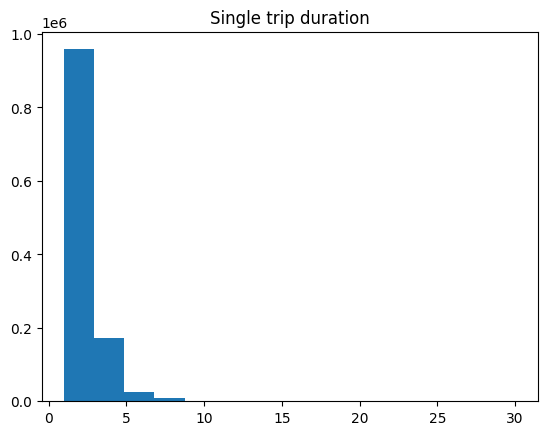

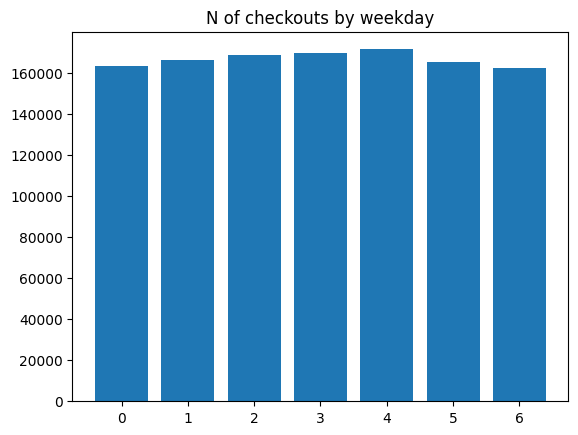

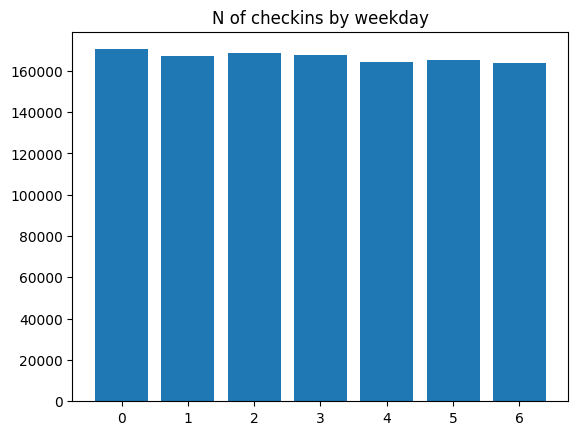

N unique values of city_id: 39901
N unique values of hotel_country: 195
N unique values of device_class: 3
N unique values of affiliate_id: 3254
N unique values of booker_country: 5

NaN values:
user_id           0
checkin           0
checkout          0
city_id           0
device_class      0
affiliate_id      0
booker_country    0
hotel_country     0
utrip_id          0
dtype: int64


In [8]:

analyse_data("../data/train_set.csv")